In [247]:
import numpy as np
import pandas as pd
import re

In [248]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [249]:
df = pd.read_csv(r'C:\Real Estate Capstone Project\Datasets\L2\gurgaon_properties_cleaned_v1.csv')

In [250]:
df.duplicated().sum()

np.int64(122)

In [251]:
df = df.dropna(subset=['property_type'])

In [252]:
df.head(1)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,shree vardhman flora,sector 90,0.7,5177.0,1352.0,Carpet area: 1352 (125.6 sq.m.),2.0,3.0,2,study room,7.0,North,1 to 5 Year Old,"['IRIS Broadway Mall', 'Dwarka Expressway', 'Saraswati Model School', 'SGT University', 'Aarvy Healthcare Hospital', 'Indira Gandhi International Airport', 'Garhi Harsaru Junction', 'Orchid Business Park', 'Holiday Inn Gurugram Sector 90', 'Flying Wings Badminton Academy']","['2 Wardrobe', '6 Fan', '1 Exhaust Fan', '2 Geyser', '18 Light', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"


## 1. areaWithType

In [253]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
3525,1.08,1800.0,Super Built up area 1800(167.23 sq.m.)Built Up area: 1700 sq.ft. (157.94 sq.m.)Carpet area: 1600 sq.ft. (148.64 sq.m.)
894,5.30,1935.0,Plot area 215(179.77 sq.m.)
916,1.39,1923.0,Super Built up area 1920(178.37 sq.m.)
1773,7.00,5400.0,Plot area 600(501.68 sq.m.)
2199,1.25,1080.0,Plot area 120(100.34 sq.m.)Built Up area: 120 sq.yards (100.34 sq.m.)


In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3803 entries, 0 to 3802
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3803 non-null   object 
 1   society          3802 non-null   object 
 2   sector           3803 non-null   object 
 3   price            3785 non-null   float64
 4   price_per_sqft   3785 non-null   float64
 5   area             3785 non-null   float64
 6   areaWithType     3803 non-null   object 
 7   bedRoom          3803 non-null   float64
 8   bathroom         3803 non-null   float64
 9   balcony          3803 non-null   object 
 10  additionalRoom   3803 non-null   object 
 11  floorNum         3784 non-null   float64
 12  facing           2698 non-null   object 
 13  agePossession    3802 non-null   object 
 14  nearbyLocations  3626 non-null   object 
 15  furnishDetails   2822 non-null   object 
 16  features         3168 non-null   object 
dtypes: float64(6), obje

In [255]:
def get_area(text, area_type):
    try:
        text = str(text)
        match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
        if match:
            return float(match.group(1))
    except:
        pass
    return None

def get_super_built_up_area(text):
    try:
        text = str(text)
        match = re.search(r'Super Built up area\s+(\d+\.?\d*)', text)
        if match:
            return float(match.group(1))
    except:
        pass
    return None


In [256]:
import re
import pandas as pd

def convert_to_sqft(text, area_value):
    if area_value is None or pd.isna(area_value):
        return None
    try:
        text = str(text)  # 💣 ensure input is string

        # Try matching area_value followed by "(xxx sq.m.)"
        match = re.search(r'{}\s*\((\d+\.?\d*)\s*sq\.m'.format(int(area_value)), text)
        if match:
            sq_m_value = float(match.group(1))
            return round(sq_m_value * 10.7639, 2)  # convert sq.m. to sqft

        # If no match, return original area_value as-is
        return area_value
    except Exception as e:
        print(f"[convert_to_sqft ERROR] text: {text}, area_value: {area_value} → {e}")
        return None


In [257]:
# Extract Super Built up area and convert to sqft
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)


In [258]:
df.sample()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
790,flat,aipl the peaceful homes,sector 70a,2.55,11860.0,2150.0,Super Built up area 2150(199.74 sq.m.)Built Up area: 2000 sq.ft. (185.81 sq.m.),3.0,3.0,3,"pooja room,servant room,others",20.0,North-East,0 to 1 Year Old,"['Airia Mall', 'Golf Corse Ext. Rd.', 'National Highway-48', 'Indus World School', 'Gurugram University', 'Ananta Hospital', 'Indira Gandhi International Airport', 'DLF Corporate Greens', 'IMT Manesar', 'Hyatt Regency Gurgaon', 'SkyJumper Trampoline Park']","['5 Wardrobe', '5 Fan', '1 Exhaust Fan', '3 Geyser', '1 Stove', '11 Light', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Club house / Community Center']",2149.98,2000.0,NaN


In [259]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
290,3.30,flat,2400.0,Carpet area: 2400 (222.97 sq.m.),NaN,NaN,2400.03
2656,0.90,flat,2000.0,Built Up area: 2000 (185.81 sq.m.),NaN,2000.04,NaN
547,0.64,flat,1300.0,Super Built up area 1300(120.77 sq.m.)Carpet area: 1100 sq.ft. (102.19 sq.m.),1299.96,NaN,1100.00
3675,2.20,flat,2018.0,Super Built up area 2018(187.48 sq.m.),2018.02,NaN,NaN
1449,1.37,flat,1500.0,Super Built up area 1500(139.35 sq.m.)Built Up area: 1450 sq.ft. (134.71 sq.m.)Carpet area: 1400 sq.ft. (130.06 sq.m.),1499.95,1450.00,1400.00


In [260]:
df.duplicated().sum()

np.int64(122)

In [261]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [262]:
df[df['areaWithType'].str.contains('Plot', na=False)][['price', 'property_type', 'area', 'areaWithType', 'super_built_up_area', 'built_up_area', 'carpet_area']].shape

(682, 7)

In [263]:
df[df['areaWithType'].str.contains('Plot', na=False)][['price', 'property_type', 'area', 'areaWithType', 'super_built_up_area', 'built_up_area', 'carpet_area']].head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
5,4.50,house,4950.0,Plot area 550(459.87 sq.m.),NaN,NaN,NaN
7,3.51,house,2844.0,Plot area 316(264.22 sq.m.),NaN,NaN,NaN
12,9.50,house,2250.0,Plot area 302(252.51 sq.m.)Built Up area: 300 sq.yards (250.84 sq.m.)Carpet area: 250 sq.yards (209.03 sq.m.),NaN,300.0,250.0
32,1.40,house,585.0,Plot area 65(54.35 sq.m.)Built Up area: 62 sq.yards (51.84 sq.m.)Carpet area: 60 sq.yards (50.17 sq.m.),NaN,62.0,60.0
34,5.50,house,1935.0,Plot area 215(179.77 sq.m.),NaN,NaN,NaN


In [264]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [265]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [266]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
5,4.50,house,4950.0,Plot area 550(459.87 sq.m.),NaN,NaN,NaN
7,3.51,house,2844.0,Plot area 316(264.22 sq.m.),NaN,NaN,NaN
34,5.50,house,1935.0,Plot area 215(179.77 sq.m.),NaN,NaN,NaN
40,4.00,house,1836.0,Plot area 204(170.57 sq.m.),NaN,NaN,NaN
42,5.40,house,2610.0,Plot area 290(242.48 sq.m.),NaN,NaN,NaN


In [267]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [268]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    try:
        text = str(area_with_type)
        match = re.search(r'Plot area\s+(\d+\.?\d*)', text)
        return float(match.group(1)) if match else None
    except:
        return None

In [269]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

In [270]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
5,4.50,house,4950.0,Plot area 550(459.87 sq.m.),NaN,550.00,NaN
7,3.51,house,2844.0,Plot area 316(264.22 sq.m.),NaN,316.00,NaN
34,5.50,house,1935.0,Plot area 215(179.77 sq.m.),NaN,215.00,NaN
40,4.00,house,1836.0,Plot area 204(170.57 sq.m.),NaN,204.00,NaN
42,5.40,house,2610.0,Plot area 290(242.48 sq.m.),NaN,290.00,NaN
49,10.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,360.00,NaN
56,16.00,house,4571.0,Plot area 500(418.06 sq.m.),NaN,500.00,NaN
58,1.10,house,1782.0,Plot area 1782(165.55 sq.m.),NaN,1782.00,NaN
66,6.30,house,1800.0,Plot area 200(167.23 sq.m.),NaN,200.00,NaN
71,9.01,house,5608.0,Plot area 521,NaN,521.00,NaN


In [271]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [272]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [273]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
5,4.50,house,4950.0,Plot area 550(459.87 sq.m.),NaN,4950.00,NaN
7,3.51,house,2844.0,Plot area 316(264.22 sq.m.),NaN,2844.00,NaN
34,5.50,house,1935.0,Plot area 215(179.77 sq.m.),NaN,1935.00,NaN
40,4.00,house,1836.0,Plot area 204(170.57 sq.m.),NaN,1836.00,NaN
42,5.40,house,2610.0,Plot area 290(242.48 sq.m.),NaN,2610.00,NaN
49,10.00,house,3240.0,Plot area 360(301.01 sq.m.),NaN,3240.00,NaN
56,16.00,house,4571.0,Plot area 500(418.06 sq.m.),NaN,4500.00,NaN
58,1.10,house,1782.0,Plot area 1782(165.55 sq.m.),NaN,1782.00,NaN
66,6.30,house,1800.0,Plot area 200(167.23 sq.m.),NaN,1800.00,NaN
71,9.01,house,5608.0,Plot area 521,NaN,5574.70,NaN


In [274]:
# update the original dataframe
df.update(all_nan_df)

In [275]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [276]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,shree vardhman flora,sector 90,0.70,5177.0,1352.0,Carpet area: 1352 (125.6 sq.m.),2.0,3.0,2,study room,7.0,North,1 to 5 Year Old,"['IRIS Broadway Mall', 'Dwarka Expressway', 'Saraswati Model School', 'SGT University', 'Aarvy Healthcare Hospital', 'Indira Gandhi International Airport', 'Garhi Harsaru Junction', 'Orchid Business Park', 'Holiday Inn Gurugram Sector 90', 'Flying Wings Badminton Academy']","['2 Wardrobe', '6 Fan', '1 Exhaust Fan', '2 Geyser', '18 Light', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",NaN,NaN,1351.95
1,house,independent,sector 69,0.80,10484.0,763.0,Built Up area: 763 (70.89 sq.m.),1.0,1.0,0,not available,1.0,NaN,undefined,"['Sri Radhe Krishna Temple', 'Icici bank ATM', 'Standard chartered ATM', 'Ekta Hospital', 'Sai Heart and Trauma Center', 'Sai Dharamraj Hospital', 'Sona Devi Memorial Hospital and Trauma Centre', 'Sanjeevani Hospital Gurgaon', 'Gobind Hospital', 'Kamal Hospital and Maternity Centre', 'Divine Look Clinic Centre', 'Skin Clinic', 'Dr. Anuj Sharma', 'Dr. Naresh Pandita', 'Dr. Aruna Kalra', 'Wellness Eye Centre', 'Best Urologist Atcomplete Family Clinic', 'Neelkanth Health Care', 'Vishesh Dental', 'Bones Clinic - Orthopaedics', 'Park Hospital Gurgaon', 'Wembley estate club', 'Genius', 'Gardian Pharmacy', 'Apollo Pharmacy', 'Kore Tech Park', 'SPAZE BUSINESS PARK', 'Central bank of india', 'Union bank of india', 'Indusind bank', 'State bank of india', 'Hdfc bank', 'Icici bank', 'Icici bank', 'Hdfc bank', 'Hdfc bank', 'SRS Cinemas', 'Nook', 'Starbucks', ""Nirula's"", ""Domino's Pizza"", 'India', 'Haldiram']","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,763.05,NaN
2,flat,experion the heartsong,sector 108,0.98,13343.0,734.0,Super Built up area 1283(119.19 sq.m.)Built Up area: 978.23 sq.ft. (90.88 sq.m.)Carpet area: 734.43 sq.ft. (68.23 sq.m.),2.0,3.0,3,study room,4.0,East,1 to 5 Year Old,"['Galleria 108 Mall', 'Dwarka Expressway', 'Central Peripheral Road', 'The Shikshiyan School', 'Manipal Hospital', 'Indira Gandhi International Airport', 'Vivanta New Delhi, Dwarka', 'SkyJumper Trampoline Park', 'Fun N Food Village']","['1 Bed', '1 Sofa', '8 Light', '3 AC', '1 Curtains', 'No Chimney', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']",1282.95,978.23,734.43
3,flat,pioneer park,sector 61,1.60,11594.0,1380.0,Carpet area: 1380 (128.21 sq.m.),2.0,2.0,2,servant room,21.0,NaN,1 to 5 Year Old,"['Sector 55-56 Rapid Metro', 'Hong Kong Bazaar', 'Golf Course Ext Rd', 'Gurugram University', 'Pathways School Gurgaon', 'W Pratiksha Hospital', 'Indira Gandhi International Airport', 'Duke Horse Riding Club', 'DLF Golf and Country Club', 'AIPL Busi

## 2.additionalRoom

In [277]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
study room,servant room                            99
store room                                         99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
pooja room,st

In [278]:
# Additional rooms to check
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Create binary indicator columns for each room type
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col, case=False, na=False).astype(int)

In [279]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
2130,not available,0,0,0,0,0
2627,servant room,0,1,0,0,0
1124,not available,0,0,0,0,0
971,servant room,0,1,0,0,0
152,pooja room,0,0,0,1,0


In [280]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,shree vardhman flora,sector 90,0.70,5177.0,1352.0,Carpet area: 1352 (125.6 sq.m.),2.0,3.0,2,study room,7.0,North,1 to 5 Year Old,"['IRIS Broadway Mall', 'Dwarka Expressway', 'Saraswati Model School', 'SGT University', 'Aarvy Healthcare Hospital', 'Indira Gandhi International Airport', 'Garhi Harsaru Junction', 'Orchid Business Park', 'Holiday Inn Gurugram Sector 90', 'Flying Wings Badminton Academy']","['2 Wardrobe', '6 Fan', '1 Exhaust Fan', '2 Geyser', '18 Light', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",NaN,NaN,1351.95,1,0,0,0,0
1,house,independent,sector 69,0.80,10484.0,763.0,Built Up area: 763 (70.89 sq.m.),1.0,1.0,0,not available,1.0,NaN,undefined,"['Sri Radhe Krishna Temple', 'Icici bank ATM', 'Standard chartered ATM', 'Ekta Hospital', 'Sai Heart and Trauma Center', 'Sai Dharamraj Hospital', 'Sona Devi Memorial Hospital and Trauma Centre', 'Sanjeevani Hospital Gurgaon', 'Gobind Hospital', 'Kamal Hospital and Maternity Centre', 'Divine Look Clinic Centre', 'Skin Clinic', 'Dr. Anuj Sharma', 'Dr. Naresh Pandita', 'Dr. Aruna Kalra', 'Wellness Eye Centre', 'Best Urologist Atcomplete Family Clinic', 'Neelkanth Health Care', 'Vishesh Dental', 'Bones Clinic - Orthopaedics', 'Park Hospital Gurgaon', 'Wembley estate club', 'Genius', 'Gardian Pharmacy', 'Apollo Pharmacy', 'Kore Tech Park', 'SPAZE BUSINESS PARK', 'Central bank of india', 'Union bank of india', 'Indusind bank', 'State bank of india', 'Hdfc bank', 'Icici bank', 'Icici bank', 'Hdfc bank', 'Hdfc bank', 'SRS Cinemas', 'Nook', 'Starbucks', ""Nirula's"", ""Domino's Pizza"", 'India', 'Haldiram']","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,763.05,NaN,0,0,0,0,0
2,flat,experion the heartsong,sector 108,0.98,13343.0,734.0,Super Built up area 1283(119.19 sq.m.)Built Up area: 978.23 sq.ft. (90.88 sq.m.)Carpet area: 734.43 sq.ft. (68.23 sq.m.),2.0,3.0,3,study room,4.0,East,1 to 5 Year Old,"['Galleria 108 Mall', 'Dwarka Expressway', 'Central Peripheral Road', 'The Shikshiyan School', 'Manipal Hospital', 'Indira Gandhi International Airport', 'Vivanta New Delhi, Dwarka', 'SkyJumper Trampoline Park', 'Fun N Food Village']","['1 Bed', '1 Sofa', '8 Light', '3 AC', '1 Curtains', 'No Chimney', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']",1282.95,978.23,734.43,1,0,0,0,0
3,flat,pioneer park,sector 61,1.60,11594.0,1380.0,Carpet area: 1380 (128.21 sq.m.),2.0,2.0,2,servant room,21.0,NaN,1 to 5 Year Old,"['Sector 55-56 Rapid Metro', 'Hong Kong Bazaar', 'Golf Course Ext Rd', 'Gurugram University', 'Pathways School Gurgaon', 'W Pratiksha Hospital', 'Indira Gandhi Intern

## 3.agePossession

In [281]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Oct 2024                 8
Jan 2024                 8
Aug 2023                 7
Dec 2025                 7
Jun 2024                 7
Nov 2023                 5
Oct 2023                 4
Jul 2024                 4
Sep 2023                 4
By 2025                  4
Aug 2024                 4
Nov 2024                 3
Feb 2024                 3
Jan 2025                 3
May 2024                 3
Mar 2025                 2
Jan 2026                 2
Jun 2027                 2
Oct 2025                 2
Jul 2025                 2
Sep 2025                 2
Aug 2025                 2
Jul 2027                 2
Dec 2026      

In [282]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [283]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [284]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: count, dtype: int64

In [285]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,shree vardhman flora,sector 90,0.70,5177.0,1352.0,Carpet area: 1352 (125.6 sq.m.),2.0,3.0,2,study room,7.0,North,Relatively New,"['IRIS Broadway Mall', 'Dwarka Expressway', 'Saraswati Model School', 'SGT University', 'Aarvy Healthcare Hospital', 'Indira Gandhi International Airport', 'Garhi Harsaru Junction', 'Orchid Business Park', 'Holiday Inn Gurugram Sector 90', 'Flying Wings Badminton Academy']","['2 Wardrobe', '6 Fan', '1 Exhaust Fan', '2 Geyser', '18 Light', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",NaN,NaN,1351.95,1,0,0,0,0
1,house,independent,sector 69,0.80,10484.0,763.0,Built Up area: 763 (70.89 sq.m.),1.0,1.0,0,not available,1.0,NaN,Undefined,"['Sri Radhe Krishna Temple', 'Icici bank ATM', 'Standard chartered ATM', 'Ekta Hospital', 'Sai Heart and Trauma Center', 'Sai Dharamraj Hospital', 'Sona Devi Memorial Hospital and Trauma Centre', 'Sanjeevani Hospital Gurgaon', 'Gobind Hospital', 'Kamal Hospital and Maternity Centre', 'Divine Look Clinic Centre', 'Skin Clinic', 'Dr. Anuj Sharma', 'Dr. Naresh Pandita', 'Dr. Aruna Kalra', 'Wellness Eye Centre', 'Best Urologist Atcomplete Family Clinic', 'Neelkanth Health Care', 'Vishesh Dental', 'Bones Clinic - Orthopaedics', 'Park Hospital Gurgaon', 'Wembley estate club', 'Genius', 'Gardian Pharmacy', 'Apollo Pharmacy', 'Kore Tech Park', 'SPAZE BUSINESS PARK', 'Central bank of india', 'Union bank of india', 'Indusind bank', 'State bank of india', 'Hdfc bank', 'Icici bank', 'Icici bank', 'Hdfc bank', 'Hdfc bank', 'SRS Cinemas', 'Nook', 'Starbucks', ""Nirula's"", ""Domino's Pizza"", 'India', 'Haldiram']","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,763.05,NaN,0,0,0,0,0
2,flat,experion the heartsong,sector 108,0.98,13343.0,734.0,Super Built up area 1283(119.19 sq.m.)Built Up area: 978.23 sq.ft. (90.88 sq.m.)Carpet area: 734.43 sq.ft. (68.23 sq.m.),2.0,3.0,3,study room,4.0,East,Relatively New,"['Galleria 108 Mall', 'Dwarka Expressway', 'Central Peripheral Road', 'The Shikshiyan School', 'Manipal Hospital', 'Indira Gandhi International Airport', 'Vivanta New Delhi, Dwarka', 'SkyJumper Trampoline Park', 'Fun N Food Village']","['1 Bed', '1 Sofa', '8 Light', '3 AC', '1 Curtains', 'No Chimney', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']",1282.95,978.23,734.43,1,0,0,0,0
3,flat,pioneer park,sector 61,1.60,11594.0,1380.0,Carpet area: 1380 (128.21 sq.m.),2.0,2.0,2,servant room,21.0,NaN,Relatively New,"['Sector 55-56 Rapid Metro', 'Hong Kong Bazaar', 'Golf Course Ext Rd', 'Gurugram University', 'Pathways School Gurgaon', 'W Pratiksha Hospital', 'Indira Gandhi Internati

## 4.furnishDetails

In [286]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
2078,"['4 Wardrobe', '7 Fan', '4 Geyser', '11 Light', '1 Modular Kitchen', '1 Chimney', '1 Curtains', 'No AC', 'No Bed', 'No Dining Table', 'No Exhaust Fan', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Spacious Interiors', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center', 'Water softening plant']"
2777,"['1 Water Purifier', '4 Fan', '1 Exhaust Fan', '2 Geyser', '14 Light', '3 AC', '1 Modular Kitchen', '1 Chimney', '5 Curtains', '3 Wardrobe', '1 Washing Machine', 'No Bed', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV']","['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
827,"['7 Wardrobe', '9 Fan', '1 Exhaust Fan', '2 Geyser', '15 Light', '1 Modular Kitchen', '1 Chimney', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Bank Attached Property', 'Visitor Parking', 'Park', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting']"
1473,NaN,"['Water purifier', 'Centrally Air Conditioned', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Fitness Centre / GYM', 'Club house / Community Center']"
405,NaN,NaN


In [287]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]


<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
C:\Users\dell\AppData\Local\Temp\ipykernel_4012\1707760021.py:13: SyntaxWarning: invalid escape sequence '\d'
  pattern = re.compile(f"(\d+) {furnishing}")


In [288]:
furnishings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3803 entries, 0 to 3802
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   furnishDetails   2822 non-null   object
 1   AC               3803 non-null   int64 
 2   Sofa             3803 non-null   int64 
 3   Chimney          3803 non-null   int64 
 4   Washing Machine  3803 non-null   int64 
 5   Bed              3803 non-null   int64 
 6   Microwave        3803 non-null   int64 
 7   Fan              3803 non-null   int64 
 8   Water Purifier   3803 non-null   int64 
 9   TV               3803 non-null   int64 
 10  Fridge           3803 non-null   int64 
 11  Light            3803 non-null   int64 
 12  Modular Kitchen  3803 non-null   int64 
 13  Exhaust Fan      3803 non-null   int64 
 14  Stove            3803 non-null   int64 
 15  Wardrobe         3803 non-null   int64 
 16  Geyser           3803 non-null   int64 
 17  Curtains         3803 non-null   int64

In [289]:
furnishings_df.shape

(3803, 19)

In [290]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

C:\Users\dell\AppData\Local\Temp\ipykernel_4012\2609480216.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [291]:
furnishings_df.sample(5)

,AC,Sofa,Chimney,Washing Machine,Bed,Microwave,Fan,Water Purifier,TV,Fridge,Light,Modular Kitchen,Exhaust Fan,Stove,Wardrobe,Geyser,Curtains,Dining Table
1293,12,0,0,0,0,1,16,1,0,1,16,1,0,0,0,0,0,1
2590,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1276,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
109,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2192,0,0,1,0,0,0,3,0,0,0,7,0,1,0,2,3,0,0


In [292]:
furnishings_df.shape

(3803, 18)

In [293]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [294]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [295]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

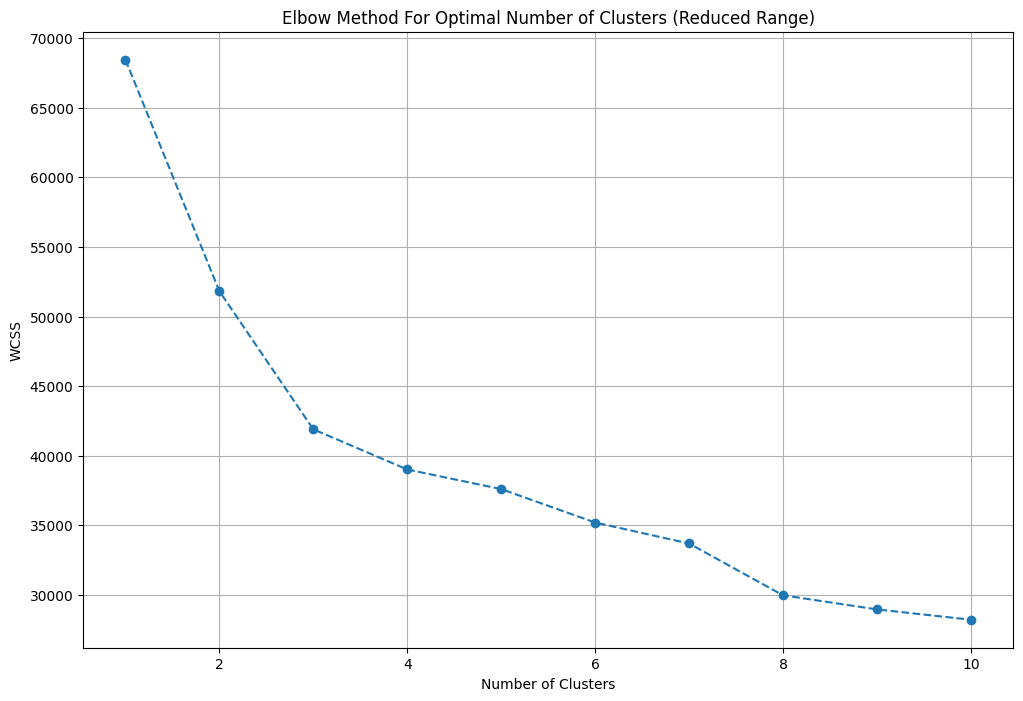

In [296]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [297]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [298]:
df = df.iloc[:,:-18]

In [299]:
df['furnishing_type'] = cluster_assignments

In [300]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
2051,NaN,0
1985,"['2 Wardrobe', '4 Fan', '1 Exhaust Fan', '2 Geyser', '8 Light', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",1
2315,"['1 Bed', '1 Wardrobe', '1 Fan', '1 Geyser', '1 Light', 'No AC', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",0
1323,NaN,0
154,"['3 Fan', '3 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0


## 5.features

In [301]:
df[['society','features']].sample(5)

,society,features
3747,emaar mgf emerald floors premier,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Internet/wi-fi connectivity', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
2676,tata primanti,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
3529,signature global synera,"['Power Back-up', 'Security / Fire Alarm', 'Lift(s)', 'Maintenance Staff', 'Park', 'Visitor Parking', 'Security Personnel']"
2340,smart world gems,"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
134,unitech espace,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Fitness Centre / GYM', 'Club house / Community Center']"


In [302]:
df['features'].isnull().sum()

np.int64(635)

In [303]:
app_df = pd.read_csv(r'C:\Real Estate Capstone Project\Datasets\appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3803 entries, 0 to 3802
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3803 non-null   object 
 1   society              3802 non-null   object 
 2   sector               3803 non-null   object 
 3   price                3785 non-null   float64
 4   price_per_sqft       3785 non-null   float64
 5   area                 3785 non-null   float64
 6   areaWithType         3803 non-null   object 
 7   bedRoom              3803 non-null   float64
 8   bathroom             3803 non-null   float64
 9   balcony              3803 non-null   object 
 10  additionalRoom       3803 non-null   object 
 11  floorNum             3784 non-null   float64
 12  facing               2698 non-null   object 
 13  agePossession        3803 non-null   object 
 14  nearbyLocations      3626 non-null   object 
 15  furnishDetails       2822 non-null   object

In [306]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   PropertyName        247 non-null    object
 1   PropertySubName     247 non-null    object
 2   NearbyLocations     247 non-null    object
 3   LocationAdvantages  247 non-null    object
 4   Link                247 non-null    object
 5   PriceDetails        247 non-null    object
 6   TopFacilities       247 non-null    object
dtypes: object(7)
memory usage: 13.6+ KB


In [307]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [308]:
temp_df = df[df['features'].isnull()]

In [309]:
temp_df.shape

(635, 26)

In [310]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [311]:
df.loc[temp_df.index,'features'] = x.values

In [312]:
df['features'].isnull().sum()

np.int64(481)

In [313]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [314]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [315]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
2405,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0
678,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1758,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0
1141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
790,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,0


In [316]:
features_binary_df.shape

(3803, 130)

In [317]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

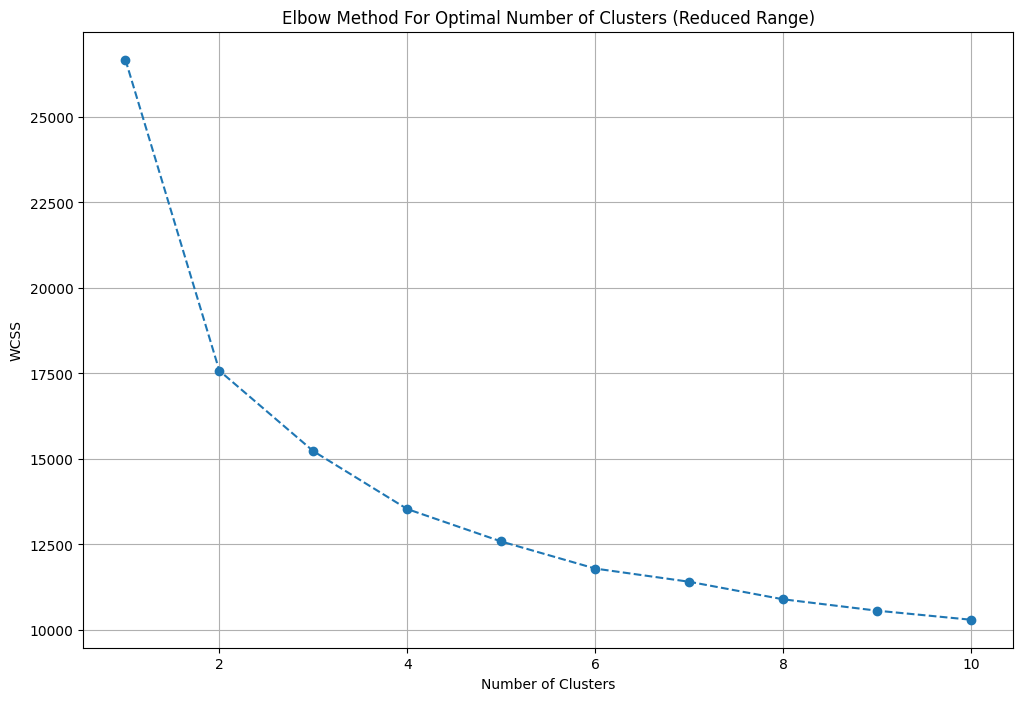

In [318]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [319]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [320]:
df['luxury_score'] = luxury_score

In [321]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,shree vardhman flora,sector 90,0.70,5177.0,1352.0,Carpet area: 1352 (125.6 sq.m.),2.0,3.0,2,study room,7.0,North,Relatively New,"['IRIS Broadway Mall', 'Dwarka Expressway', 'Saraswati Model School', 'SGT University', 'Aarvy Healthcare Hospital', 'Indira Gandhi International Airport', 'Garhi Harsaru Junction', 'Orchid Business Park', 'Holiday Inn Gurugram Sector 90', 'Flying Wings Badminton Academy']","['2 Wardrobe', '6 Fan', '1 Exhaust Fan', '2 Geyser', '18 Light', '1 Chimney', '1 Modular Kitchen', 'No AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']",NaN,NaN,1351.95,1,0,0,0,0,1,"[Feng Shui / Vaastu Compliant, Security / Fire Alarm, Intercom Facility, Lift(s), Maintenance Staff, Water Storage, Park, Visitor Parking]",49
1,house,independent,sector 69,0.80,10484.0,763.0,Built Up area: 763 (70.89 sq.m.),1.0,1.0,0,not available,1.0,NaN,Undefined,"['Sri Radhe Krishna Temple', 'Icici bank ATM', 'Standard chartered ATM', 'Ekta Hospital', 'Sai Heart and Trauma Center', 'Sai Dharamraj Hospital', 'Sona Devi Memorial Hospital and Trauma Centre', 'Sanjeevani Hospital Gurgaon', 'Gobind Hospital', 'Kamal Hospital and Maternity Centre', 'Divine Look Clinic Centre', 'Skin Clinic', 'Dr. Anuj Sharma', 'Dr. Naresh Pandita', 'Dr. Aruna Kalra', 'Wellness Eye Centre', 'Best Urologist Atcomplete Family Clinic', 'Neelkanth Health Care', 'Vishesh Dental', 'Bones Clinic - Orthopaedics', 'Park Hospital Gurgaon', 'Wembley estate club', 'Genius', 'Gardian Pharmacy', 'Apollo Pharmacy', 'Kore Tech Park', 'SPAZE BUSINESS PARK', 'Central bank of india', 'Union bank of india', 'Indusind bank', 'State bank of india', 'Hdfc bank', 'Icici bank', 'Icici bank', 'Hdfc bank', 'Hdfc bank', 'SRS Cinemas', 'Nook', 'Starbucks', ""Nirula's"", ""Domino's Pizza"", 'India', 'Haldiram']","['1 Wardrobe', '1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",NaN,NaN,763.05,NaN,0,0,0,0,0,0,[],0
2,flat,experion the heartsong,sector 108,0.98,13343.0,734.0,Super Built up area 1283(119.19 sq.m.)Built Up area: 978.23 sq.ft. (90.88 sq.m.)Carpet area: 734.43 sq.ft. (68.23 sq.m.),2.0,3.0,3,study room,4.0,East,Relatively New,"['Galleria 108 Mall', 'Dwarka Expressway', 'Central Peripheral Road', 'The Shikshiyan School', 'Manipal Hospital', 'Indira Gandhi International Airport', 'Vivanta New Delhi, Dwarka', 'SkyJumper Trampoline Park', 'Fun N Food Village']","['1 Bed', '1 Sofa', '8 Light', '3 AC', '1 Curtains', 'No Chimney', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Rain Water Harvesting', 'Club house / Community Center']",1282.95,978.23,734.43,1,0,0,0,0,0,"[Security / Fire Alarm, Feng Shui / Vaastu Compliant, Intercom Facility, Lift(s), Maintenance Staff, 

In [322]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [323]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2039,house,independent,sector 7,0.66,12000.0,550.0,Plot area 550(51.1 sq.m.),3.0,1.0,1,3.0,East,Relatively New,NaN,550.00,NaN,0,0,0,0,1,0,22
829,house,independent,sector 110,0.34,6800.0,500.0,Built Up area: 500 (46.45 sq.m.),1.0,1.0,0,1.0,NaN,Undefined,NaN,499.98,NaN,0,0,0,0,0,0,0
333,flat,godrej summit,sector 104,1.35,5000.0,2700.0,Carpet area: 2700 (250.84 sq.m.),4.0,5.0,3+,0.0,North-East,Relatively New,NaN,NaN,2700.02,1,1,1,1,0,0,112
1438,flat,ss the leaf,sector 85,1.10,9565.0,1150.0,Super Built up area 1640(152.36 sq.m.)Built Up area: 1600 sq.ft. (148.64 sq.m.)Carpet area: 1150 sq.ft. (106.84 sq.m.),2.0,2.0,3,10.0,West,Relatively New,1639.99,1600.00,1150.00,0,0,0,1,0,0,150
712,flat,pyramid urban,sector 67a,0.60,8571.0,700.0,Super Built up area 700(65.03 sq.m.),2.0,2.0,2,14.0,NaN,New Property,699.98,NaN,NaN,0,0,0,0,0,0,15


In [324]:
df.shape

(3803, 23)

In [325]:
df.to_csv('gurgaon_properties_cleaned_v2.csv',index=False)